# Notebook for EE Pre-Project Research
#### CUBEMs Data Loading and Data Analysis
*By Patcharanat P.*

For Energy Consumption Analytics and Visualization: https://nbviewer.org/github/mpipatta/mpipatta.github.io/blob/master/CHAM5.ipynb

## Import Library

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('dark')

import json
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Load Data and Exploratory

In [59]:
# Datasource
file = open('data.json')
data_json = json.load(file)
data_json['repositories']

[{'name': 'figshare',
  'value': 'https://doi.org/10.6084/m9.figshare.11726517.v6',
  '@type': 'DataCatalog'}]

In [60]:
for year in [2018, 2019]:
    for floor in [i for i in range(1, 8)]:
        path = f'dataset/{year}Floor{floor}.csv'
        exec(f"df_year{year}_floor{floor} = pd.read_csv('{path}')")
        exec(f"print(df_year{year}_floor{floor}.shape[1])")

12
37
30
30
30
30
30
12
37
30
30
30
30
30


In [61]:
790560*7

5533920

In [62]:
date_format = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

df_floor3_2018 = pd.read_csv('dataset/2018Floor3.csv',
                 parse_dates=['Date'],
                date_parser=date_format)

df_floor3_2019 = pd.read_csv('dataset/2019Floor3.csv',
                 parse_dates=['Date'],
                date_parser=date_format)

df = pd.concat([df_floor3_2018, df_floor3_2019])
# df = df_floor3_2019
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790560 entries, 0 to 525599
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          790560 non-null  datetime64[ns]
 1   z1_AC1(kW)    719633 non-null  float64       
 2   z1_AC2(kW)    719633 non-null  float64       
 3   z1_AC3(kW)    719633 non-null  float64       
 4   z1_AC4(kW)    687770 non-null  float64       
 5   z1_Light(kW)  730710 non-null  float64       
 6   z1_Plug(kW)   730827 non-null  float64       
 7   z1_S1(degC)   498458 non-null  float64       
 8   z1_S1(RH%)    498456 non-null  float64       
 9   z1_S1(lux)    498453 non-null  float64       
 10  z2_AC1(kW)    687781 non-null  float64       
 11  z2_Light(kW)  729811 non-null  float64       
 12  z2_Plug(kW)   730808 non-null  float64       
 13  z2_S1(degC)   516157 non-null  float64       
 14  z2_S1(RH%)    516153 non-null  float64       
 15  z2_S1(lux)    516

## Data Wrangling (Cleaning & Manipulation)

In [63]:
print('Selected Columns')
for column in df.columns:
    if 'z1' in column:
        print(column)
print()
print('All: ', df.columns)

Selected Columns
z1_AC1(kW)
z1_AC2(kW)
z1_AC3(kW)
z1_AC4(kW)
z1_Light(kW)
z1_Plug(kW)
z1_S1(degC)
z1_S1(RH%)
z1_S1(lux)

All:  Index(['Date', 'z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
       'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
       'z1_S1(lux)', 'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)',
       'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')


In [64]:
col_select = ['Date']
for column in df.columns:
    if "z1" in column:
        col_select.append(column)
    else:
        continue
df_new = df[col_select]
df_new

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.0,0.07,0.0,0.03,28.44,60.67,0.0
1,2018-07-01 00:01:00,0.0,0.0,0.0,0.07,0.0,0.03,28.44,60.67,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,0.07,0.0,0.03,28.45,60.67,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,0.07,0.0,0.03,28.45,60.66,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,0.07,0.0,0.03,28.45,60.66,0.0
...,...,...,...,...,...,...,...,...,...,...
525595,2019-12-31 23:55:00,0.0,0.0,0.0,0.00,0.0,0.05,26.98,63.50,0.0
525596,2019-12-31 23:56:00,0.0,0.0,0.0,0.00,0.0,0.05,26.97,63.60,0.0
525597,2019-12-31 23:57:00,0.0,0.0,0.0,0.00,0.0,0.05,26.97,63.50,0.0
525598,2019-12-31 23:58:00,0.0,0.0,0.0,0.00,0.0,0.05,26.97,63.40,0.0


In [65]:
df_new.isnull().sum()

Date                 0
z1_AC1(kW)       70927
z1_AC2(kW)       70927
z1_AC3(kW)       70927
z1_AC4(kW)      102790
z1_Light(kW)     59850
z1_Plug(kW)      59733
z1_S1(degC)     292102
z1_S1(RH%)      292104
z1_S1(lux)      292107
dtype: int64

Text(0.5, 23.52222222222222, 'Period of time')

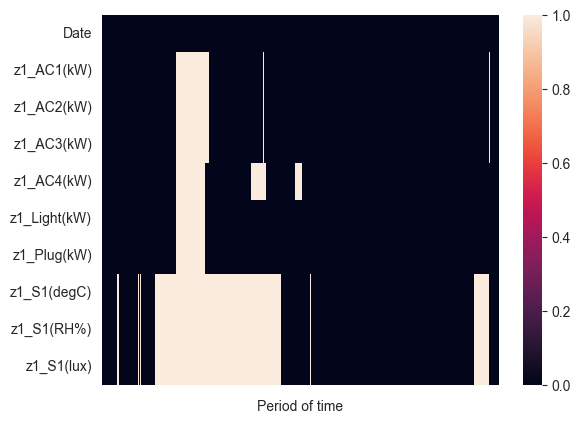

In [66]:
plot = sns.heatmap(df_new.isnull().transpose())
plot.set(xticklabels=[])
plt.xlabel('Period of time')

<AxesSubplot:>

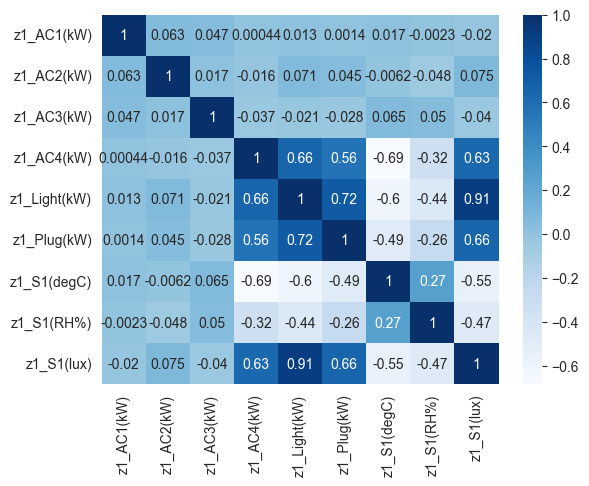

In [67]:
sns.heatmap(df_new.corr(), cmap='Blues', annot=True)

In [68]:
df_new = df_new.reset_index(drop=True)
# df_new.fillna(method='ffill', inplace=True)

In [69]:
i = 0
lower_resolution_df = []
time = {'Date': []}
while i < df_new.shape[0]:
    # Date columns
    time['Date'].append(df_new.loc[i, 'Date'])
    # the others
    if i+10 < df_new.shape[0]:
        temp_series = df_new.iloc[i:i+10].mean()
    else :
        temp_series = df_new.iloc[i:].mean()
    # temp_series = pd.concat(df_new.loc[i, 'Date'], temp_series)
    lower_resolution_df.append(temp_series)
    
    i += 10

df_lower_resolution = pd.concat(lower_resolution_df, axis=1)
df_lower_resolution = df_lower_resolution.transpose()
df_temp = pd.concat([pd.DataFrame(time), df_lower_resolution], axis=1)

In [70]:
df_sample = df_temp
df_sample

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.0,0.07,0.0,0.030,28.452000,60.655000,0.0
1,2018-07-01 00:10:00,0.0,0.0,0.0,0.07,0.0,0.030,28.471667,60.628333,0.0
2,2018-07-01 00:20:00,0.0,0.0,0.0,0.07,0.0,0.030,28.645000,60.331000,0.0
3,2018-07-01 00:30:00,0.0,0.0,0.0,0.07,0.0,0.030,28.831667,59.800000,0.0
4,2018-07-01 00:40:00,0.0,0.0,0.0,0.07,0.0,0.030,28.794000,59.944000,0.0
...,...,...,...,...,...,...,...,...,...,...
79051,2019-12-31 23:10:00,0.0,0.0,0.0,0.00,0.0,0.050,26.978000,62.985000,0.0
79052,2019-12-31 23:20:00,0.0,0.0,0.0,0.00,0.0,0.051,26.972000,63.079000,0.0
79053,2019-12-31 23:30:00,0.0,0.0,0.0,0.00,0.0,0.050,26.970000,63.310000,0.0
79054,2019-12-31 23:40:00,0.0,0.0,0.0,0.00,0.0,0.050,26.979000,63.230000,0.0


In [71]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79056 entries, 0 to 79055
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          79056 non-null  datetime64[ns]
 1   z1_AC1(kW)    72336 non-null  float64       
 2   z1_AC2(kW)    72336 non-null  float64       
 3   z1_AC3(kW)    72336 non-null  float64       
 4   z1_AC4(kW)    68818 non-null  float64       
 5   z1_Light(kW)  73125 non-null  float64       
 6   z1_Plug(kW)   73126 non-null  float64       
 7   z1_S1(degC)   50437 non-null  float64       
 8   z1_S1(RH%)    50437 non-null  float64       
 9   z1_S1(lux)    50437 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 6.0 MB


### Set Date as index

In [72]:
df_sample = df_sample.set_index('Date')
df_sample.index = pd.to_datetime(df_sample.index)
df_sample

,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux)
Date,,,,,,,,,
2018-07-01 00:00:00,0.0,0.0,0.0,0.07,0.0,0.030,28.452000,60.655000,0.0
2018-07-01 00:10:00,0.0,0.0,0.0,0.07,0.0,0.030,28.471667,60.628333,0.0
2018-07-01 00:20:00,0.0,0.0,0.0,0.07,0.0,0.030,28.645000,60.331000,0.0
2018-07-01 00:30:00,0.0,0.0,0.0,0.07,0.0,0.030,28.831667,59.800000,0.0
2018-07-01 00:40:00,0.0,0.0,0.0,0.07,0.0,0.030,28.794000,59.944000,0.0
...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,0.0,0.0,0.0,0.00,0.0,0.050,26.978000,62.985000,0.0
2019-12-31 23:20:00,0.0,0.0,0.0,0.00,0.0,0.051,26.972000,63.079000,0.0
2019-12-31 23:30:00,0.0,0.0,0.0,0.00,0.0,0.050,26.970000,63.310000,0.0


## Model Development

### Pre-processing

#### Feature Engineering
*Feature Creation*

In [73]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

Fill null value groupby created features

In [74]:
df_sample = create_features(df_sample)
df_sample

,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,
2018-07-01 00:00:00,0.0,0.0,0.0,0.07,0.0,0.030,28.452000,...,6,3,7,2018,182,1,26
2018-07-01 00:10:00,0.0,0.0,0.0,0.07,0.0,0.030,28.471667,...,6,3,7,2018,182,1,26
2018-07-01 00:20:00,0.0,0.0,0.0,0.07,0.0,0.030,28.645000,...,6,3,7,2018,182,1,26
2018-07-01 00:30:00,0.0,0.0,0.0,0.07,0.0,0.030,28.831667,...,6,3,7,2018,182,1,26
2018-07-01 00:40:00,0.0,0.0,0.0,0.07,0.0,0.030,28.794000,...,6,3,7,2018,182,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,0.0,0.0,0.0,0.00,0.0,0.050,26.978000,...,1,4,12,2019,365,31,1
2019-12-31 23:20:00,0.0,0.0,0.0,0.00,0.0,0.051,26.972000,...,1,4,12,2019,365,31,1
2019-12-31 23:30:00,0.0,0.0,0.0,0.00,0.0,0.050,26.970000,...,1,4,12,2019,365,31,1


In [75]:
df_sample.isnull().sum()

z1_AC1(kW)       6720
z1_AC2(kW)       6720
z1_AC3(kW)       6720
z1_AC4(kW)      10238
z1_Light(kW)     5931
z1_Plug(kW)      5930
z1_S1(degC)     28619
z1_S1(RH%)      28619
z1_S1(lux)      28619
hour                0
dayofweek           0
quarter             0
month               0
year                0
dayofyear           0
dayofmonth          0
weekofyear          0
dtype: int64

In [76]:
df_sample.groupby(['year', 'month', 'dayofweek', 'hour']).mean()

z1_AC1(kW)  z1_AC2(kW)  z1_AC3(kW)  z1_AC4(kW)  \
year month dayofweek hour                                                   
2018 7     0         0            0.0         0.0         0.0    0.069933   
                     1            0.0         0.0         0.0    0.070000   
                     2            0.0         0.0         0.0    0.069933   
                     3            0.0         0.0         0.0    0.069667   
                     4            0.0         0.0         0.0    0.069200   
...                               ...         ...         ...         ...   
2019 12    6         19           0.0         0.0         0.0    0.000000   
                     20           0.0         0.0         0.0    0.000000   
                     21           0.0         0.0         0.0    0.000000   
                     22           0.0         0.0         0.0    0.000000   
                     23           0.0         0.0         0.0    0.000000   

                           z1_Light(kW)  z1_Plug(kW)  z1_S1(degC)  z1_S1(RH%)  \
year month dayofweek hour                                                       
2018 7     0         0         0.000000     0.030200    28.966023   62.466622   
                     1         0.000033     0.030267    28.975000   62.480433   
                     2         0.000000     0.030333    28.969408   62.540958   
                     3         0.000067     0.030333    29.020219   62.316379   
                     4         0.000000     0.030333    29.187317   62.061375   
...                                 ...          ...          ...         ...   
2019 12    6         19        0.000000     0.074433    26.199333   64.338167   
                     20        0.000067     0.074567    26.193750   64.375833   
                     21        0.000033     0.074967    26.192000   64.293583   
                     22        0.000000     0.076167    26.198583   64.228417   
                     23        0.000033     0.075233    26.213083   64.208667   

                           z1_S1(lux)  quarter  dayofyear  dayofmonth  \
year month dayofweek hour                                               
2018 7     0         0            0.0      3.0      197.0        16.0   
                     1            0.0      3.0      197.0        16.0   
                     2            0.0      3.0      197.0        16.0   
                     3            0.0      3.0      197.0        16.0   
                     4            0.0      3.0      197.0        16.0   
...                               ...      ...        ...         ...   
2019 12    6         19           0.0      4.0      349.0        15.0   
                     20           0.0      4.0      349.0        15.0   
                     21           0.0      4.0      349.0        15.0   
                     22           0.0      4.0      349.0        15.0   
                     23           0.0      4.0      349.0        15.0   

                           weekofyear  
year month dayofweek hour              
2018 7     0         0           29.0  
                     1           29.0  
                     2           29.0  
                     3           29.0  
                     4           29.0  
...                               ...  
2019 12    6         19          50.0  
                     20          50.0  
                     21          50.0  
                     22          50.0  
                     23          50.0  

[3024 rows x 13 columns]

In [77]:
# fillna with groupby
for col in df_sample.columns:
    df_sample[col].fillna(df_sample.groupby(['year', 'month', 'dayofweek', 'hour'])[col].transform('mean'), inplace=True)
for col in df_sample.columns:
    df_sample[col].fillna(df_sample.groupby(['month', 'dayofweek', 'hour'])[col].transform('mean'), inplace=True)
for col in df_sample.columns:
    df_sample[col].fillna(df_sample.groupby(['dayofweek', 'hour'])[col].transform('mean'), inplace=True)

# https://towardsdatascience.com/6-tips-for-dealing-with-null-values-e16d1d1a1b33

In [78]:
df_sample.isnull().sum()

z1_AC1(kW)      0
z1_AC2(kW)      0
z1_AC3(kW)      0
z1_AC4(kW)      0
z1_Light(kW)    0
z1_Plug(kW)     0
z1_S1(degC)     0
z1_S1(RH%)      0
z1_S1(lux)      0
hour            0
dayofweek       0
quarter         0
month           0
year            0
dayofyear       0
dayofmonth      0
weekofyear      0
dtype: int64

Text(0.5, 23.52222222222222, 'Period of time')

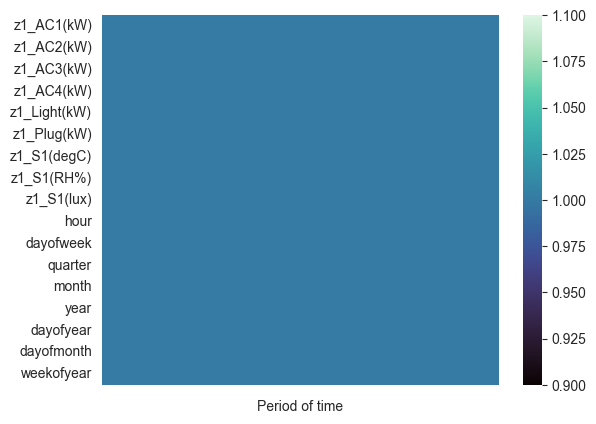

In [79]:
plot = sns.heatmap(df_sample.notnull().transpose(), cmap='mako')
plot.set(xticklabels=[])
plt.xlabel('Period of time')

In [80]:
AC = [col for col in df_sample.columns if 'AC' in col]
Light = [col for col in df_sample.columns if 'Light' in col]
Plug = [col for col in df_sample.columns if 'Plug' in col]

df_sample['sum_ac(kW)'] = df_sample[AC].sum(axis=1)
df_sample['sum_light(kW)'] = df_sample[Light].sum(axis=1)
df_sample['sum_plug(kW)'] = df_sample[Plug].sum(axis=1)
df_sample['sum_power_consumption(kW)'] = df_sample[AC+Light+Plug].sum(axis=1)

df_sample = df_sample.drop(columns=AC+Light+Plug)

# Calculating moving average
df_sample['SMA30'] = df_sample['sum_power_consumption(kW)'].rolling(30).mean()
df_sample['SMA15'] = df_sample['sum_power_consumption(kW)'].rolling(15).mean()
df_sample['SMA15'] = df_sample['sum_power_consumption(kW)'].rolling(7).mean()
df_sample = df_sample.fillna(0)

df_sample

,z1_S1(degC),z1_S1(RH%),z1_S1(lux),hour,dayofweek,quarter,month,...,weekofyear,sum_ac(kW),sum_light(kW),sum_plug(kW),sum_power_consumption(kW),SMA30,SMA15
Date,,,,,,,,,,,,,,,
2018-07-01 00:00:00,28.452000,60.655000,0.0,0,6,3,7,...,26,0.07,0.0,0.030,0.100,0.000000,0.000000
2018-07-01 00:10:00,28.471667,60.628333,0.0,0,6,3,7,...,26,0.07,0.0,0.030,0.100,0.000000,0.000000
2018-07-01 00:20:00,28.645000,60.331000,0.0,0,6,3,7,...,26,0.07,0.0,0.030,0.100,0.000000,0.000000
2018-07-01 00:30:00,28.831667,59.800000,0.0,0,6,3,7,...,26,0.07,0.0,0.030,0.100,0.000000,0.000000
2018-07-01 00:40:00,28.794000,59.944000,0.0,0,6,3,7,...,26,0.07,0.0,0.030,0.100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,26.978000,62.985000,0.0,23,1,4,12,...,1,0.00,0.0,0.050,0.050,0.050267,0.050143
2019-12-31 23:20:00,26.972000,63.079000,0.0,23,1,4,12,...,1,0.00,0.0,0.051,0.051,0.050233,0.050286
2019-12-31 23:30:00,26.970000,63.310000,0.0,23,1,4,12,...,1,0.00,0.0,0.050,0.050,0.050233,0.050143


In [81]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79056 entries, 2018-07-01 00:00:00 to 2019-12-31 23:50:00
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   z1_S1(degC)                79056 non-null  float64
 1   z1_S1(RH%)                 79056 non-null  float64
 2   z1_S1(lux)                 79056 non-null  float64
 3   hour                       79056 non-null  int64  
 4   dayofweek                  79056 non-null  int64  
 5   quarter                    79056 non-null  int64  
 6   month                      79056 non-null  int64  
 7   year                       79056 non-null  int64  
 8   dayofyear                  79056 non-null  int64  
 9   dayofmonth                 79056 non-null  int64  
 10  weekofyear                 79056 non-null  UInt32 
 11  sum_ac(kW)                 79056 non-null  float64
 12  sum_light(kW)              79056 non-null  float64
 13  sum_plug(kW

In [82]:
df_sample['weekofyear']= df_sample['weekofyear'].astype('int64')

In [83]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79056 entries, 2018-07-01 00:00:00 to 2019-12-31 23:50:00
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   z1_S1(degC)                79056 non-null  float64
 1   z1_S1(RH%)                 79056 non-null  float64
 2   z1_S1(lux)                 79056 non-null  float64
 3   hour                       79056 non-null  int64  
 4   dayofweek                  79056 non-null  int64  
 5   quarter                    79056 non-null  int64  
 6   month                      79056 non-null  int64  
 7   year                       79056 non-null  int64  
 8   dayofyear                  79056 non-null  int64  
 9   dayofmonth                 79056 non-null  int64  
 10  weekofyear                 79056 non-null  int64  
 11  sum_ac(kW)                 79056 non-null  float64
 12  sum_light(kW)              79056 non-null  float64
 13  sum_plug(kW

#### Time Series Train Test Split

Due to time series prediction, *it's important to preserve a time sequence*. So, train_test_split method which randomly select training set, and test set will be not used at this point. 

In [84]:
# 80% train set, 20% test set
df_sample['Date'] = df_sample.index
df_sample = df_sample.reset_index(drop=True)
num_temp = int(df_sample.shape[0]*0.8) # number of row split

In [85]:
X_train = df_sample.loc[:num_temp, df_sample.drop(columns=['z1_S1(degC)', 'sum_power_consumption(kW)', 'sum_ac(kW)', 'sum_light(kW)', 'sum_plug(kW)']).columns]
y_train = df_sample.loc[:num_temp, ['Date', 'sum_power_consumption(kW)']]

X_test = df_sample.loc[num_temp+1:, df_sample.drop(columns=['z1_S1(degC)', 'sum_power_consumption(kW)', 'sum_ac(kW)', 'sum_light(kW)', 'sum_plug(kW)']).columns]
y_test = df_sample.loc[num_temp+1:, ['Date', 'sum_power_consumption(kW)']]

In [86]:
X_train = X_train.set_index('Date')
y_train = y_train.set_index('Date')
X_test = X_test.set_index('Date')
y_test = y_test.set_index('Date')

### Modeling

In this case, I'm not sure about the best model to predict energy comsumption. So, I will test several models and select the best model considered by a proper accuracy.

In [87]:
# Gradient Boosting
import xgboost as xgb
# from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor() # prepare for Hyperparameters Tuning

# finding the best parameters by GridSearchCV
from sklearn.model_selection import GridSearchCV

# param_grid = [{
#     'base_score':[0.5],
#     'booster':['gbtree'],
#     'n_estimators':[500*i for i in range(5)],
#     'objective':['reg:linear'],
#     'max_depth':[i for i in range(10)],
#     'learning_rate':[0.01*i for i in range(10)],
#     'random_state':[1]
# }]

# grid = GridSearchCV(reg, param_grid=param_grid)
# grid.fit(X_train, y_train)

# best_estimator = grid.best_estimator_

# best_estimator.fit(
#     X_train, y_train,
#     eval_set=[(X_train, y_train), (X_test, y_test)],
#     verbose=100
# )

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=6,
                       learning_rate=0.03, 
                       random_state = 48)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[09:18:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:12.89150	validation_1-rmse:11.45593
[100]	validation_0-rmse:1.73691	validation_1-rmse:2.30511
[200]	validation_0-rmse:1.42322	validation_1-rmse:2.28679
[210]	validation_0-rmse:1.41633	validation_1-rmse:2.28733


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

#### Feature Importance

In [88]:
sns.set_style('dark')

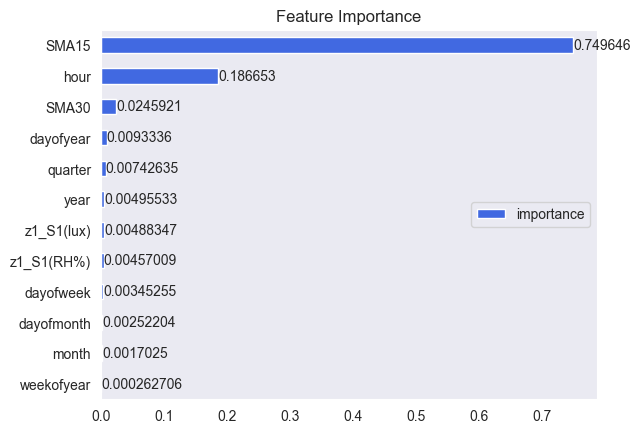

In [89]:
feature_important = pd.DataFrame(
    data=reg.feature_importances_,
    index=reg.feature_names_in_,
    columns=['importance']
)
ax = feature_important.sort_values('importance').plot(kind='barh', title='Feature Importance', color='royalblue')
ax.bar_label(ax.containers[0])
ax.legend(loc='right')
plt.show()

In [90]:
elec_usage = df_sample[['sum_ac(kW)', 'sum_light(kW)', 'sum_plug(kW)']].sum().to_dict()
elec_usage

{'sum_ac(kW)': 380491.4563858987,
 'sum_light(kW)': 139243.76006545784,
 'sum_plug(kW)': 19841.437518434846}

### Testing Model

In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [92]:
y_predict = reg.predict(X_test)

In [93]:
print('R2_score = ', r2_score(y_test, y_predict).round(4))
print('mean_absolute_error_score = ', mean_absolute_error(y_test, y_predict).round(4))
print('mean_squared_error_score = ', mean_squared_error(y_test, y_predict).round(4))

R2_score =  0.9516
mean_absolute_error_score =  0.8373
mean_squared_error_score =  5.1534
